### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
#Ignore any warnings
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [202]:
data = pd.read_csv('data/coupons.csv')

In [203]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [205]:
data.isnull().sum()
#data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [206]:
#3. Decide what to do about your missing data -- drop, replace, other ...
# Remove the 'car' column from the dataset
data.drop('car',axis = 1, inplace = True)

# Display information about the dataset including data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [207]:
# Remove all rows containing any missing values (NaN)
data = data.dropna()
data.info()
# Check and display the count of missing values in each column
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

# Missing data are of three types:
<b>Occasionality of :{Bar, Coffee House, Carryaway, Restaurant cheap or expensive} and car) </b><br>
We drop the car column in investigation. Data is too scarce and replacing is not an option 
We can use the data of those available as a witness data but no more
# Occasinality data:
<b> 42 of missiing out eating habits are missing on all categories.</b> Those we can eliminate 42/12500
<b> There doesn't seem to be correlation between other answers and other occasionals so we just eliminate all rows containing them. They are only less than 7% of the data. </b>
<b> ALternatively, we can eliminate them one by one when using the particular data</b>





4. What proportion of the total observations chose to accept the coupon?



In [210]:
# Get total number of records in dataset
totalNumber = data['Y'].count()
# Count number of records where Y equals 1 (accepted)
numberAccepted = (data['Y']==1).sum()
# Calculate percentage of accepted records
percentAccepted = numberAccepted/totalNumber;
# Print total number of records
print(totalNumber)
# Print number of accepted records
print(numberAccepted)
# Print percentage of accepted records
print(percentAccepted)

12079
6877
0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House      3816
Low restaurant    2653
Take away         2280
Bar               1913
Mid restaurant    1417
Name: count, dtype: int64


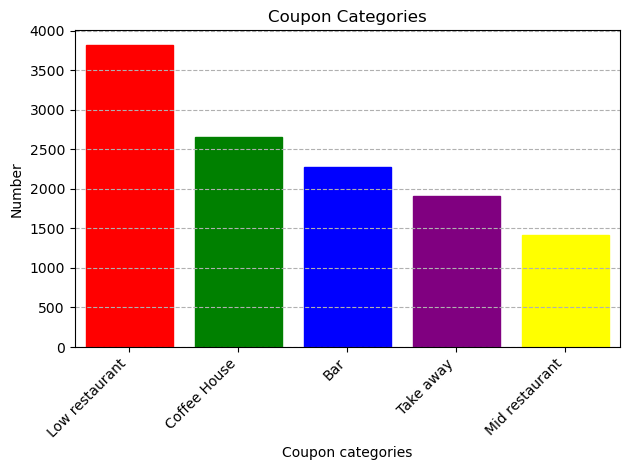

In [212]:
# Get all unique values from the 'coupon' column in the dataset prior to the change
categories = data['coupon'].unique()
# Replace restaurant categories with more readable names
data['coupon'] = data['coupon'].replace({'Restaurant(<20)':'Low restaurant'})
data['coupon'] = data['coupon'].replace({'Restaurant(20-50)':'Mid restaurant'})
data['coupon'] = data['coupon'].replace({'Carry out & Take away':'Take away'})

# Get all unique values from the 'coupon' column in the dataset
categories = data['coupon'].unique()
# Display the unique coupon categories
# Count the frequency of each unique value in the 'coupon' column
counts = data['coupon'].value_counts()
# Display the frequency counts for each coupon category
print(counts)
# Create a bar plot using seaborn with:
# - x-axis: coupon categories
# - y-axis: count of each category
# - bars colored in skyblue
ax = sns.barplot(x=categories, y=counts, color = 'skyblue')
# Set the x-axis label to 'Coupon categories'
plt.xlabel('Coupon categories')
# Set the y-axis label to 'Number' to show count
plt.ylabel('Number')
# Set the plot title to 'Coupon Categories'
plt.title('Coupon Categories')
# Set x-axis tick locations to match the coupon categories array
plt.xticks(categories)
# Add dotted horizontal grid lines to improve readability of the y-axis values
plt.grid(axis='y', linestyle='--') 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  
# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()

def apply_color_scheme(ax: plt.Axes, colors: list[str]) -> None:
    """
    Applies a color scheme to the bars in a matplotlib bar plot.
    
    Args:
        ax (plt.Axes): The matplotlib axes object containing the bar plot
        colors (list[str]): List of color names or hex codes to apply to bars
        
    Returns:
        None
    """
    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)

# Define color scheme
bar_colors = ['red', 'green', 'blue', 'purple', 'yellow']
# Apply colors to bars
apply_color_scheme(ax, bar_colors)
# Display and save the plot in images directory
plt.savefig("images/visualizingCouponColumn.png")
plt.show()
#plt.savefig('images/filename.png')

1. Created a dedicated function for applying colors, making the code more reusable and maintainable
2. Added descriptive docstring explaining the function's purpose and parameters
3. Used `zip()` instead of `enumerate()` since we don't need the index
4. Separated the color definition from the application logic


6. Use a histogram to visualize the temperature column.

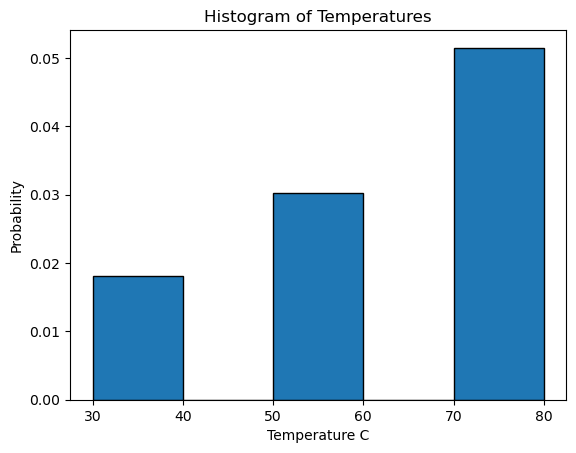

In [215]:
# Create a histogram of temperature data with black edges, 5 bins, and normalized to show probability
plt.hist(data['temperature'], edgecolor='black',bins = 5, density = True)
# Add title to the histogram
plt.title('Histogram of Temperatures')
# Label x-axis as Temperature in Celsius
plt.xlabel('Temperature C')
# Label y-axis as Probability
plt.ylabel('Probability')
# Save the plot as a PNG file in the images directory
plt.savefig("images/histogramTemperatureColumnMatplotlib.png")
plt.show()

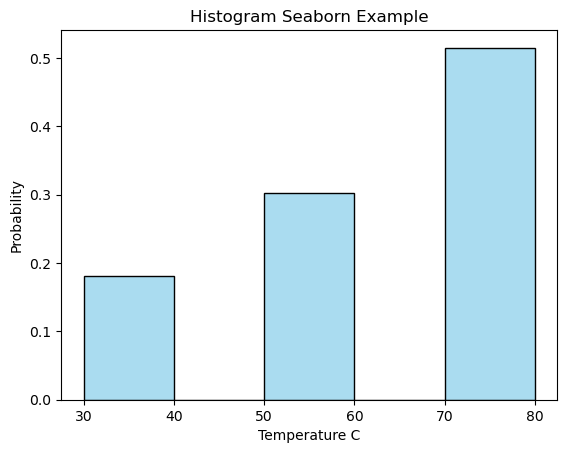

In [216]:
# Create a histogram using Seaborn's histplot:
# - data: input DataFrame
# - x: column 'temperature' to plot
# - bins: divide data into 5 equal-width bins
# - stat: show probability distribution instead of counts
# - alpha: set transparency to 0.7
# - color: set bars to 'skyblue' color
sns.histplot(data=data, x='temperature', bins = 5, stat= 'probability', alpha = 0.7, color = 'skyblue')
plt.title('Histogram Seaborn Example')
plt.xlabel('Temperature C')
plt.ylabel('Probability')
plt.savefig("images/histogramTemperatureColumnUsingseaborn.png")


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [218]:
dfBar = data[data['coupon'].str.contains('Bar')]
dfBar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [220]:
# Get total number of records in dataset
totalNumberBar = dfBar['Y'].count()
# Count number of records where Y equals 1 (accepted)
numberAcceptedBar = (dfBar['Y']==1).sum()
# Calculate percentage of accepted records
percentAcceptedBar = numberAcceptedBar/totalNumberBar;
# Print total number of records
print('Total number of Bar coupons are=',totalNumberBar)
# Print number of accepted records
print('Nymber of Bar coupons accepted is=',numberAcceptedBar)
# Print percentage of accepted records
print('Percent of Bar coupons accepte is =',percentAcceptedBar)

Total number of Bar coupons are= 1913
Nymber of Bar coupons accepted is= 788
Percent of Bar coupons accepte is = 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [222]:
# Get unique values from 'Bar' column
values = dfBar['Bar'].unique()
# Define list of values representing bar visits less than 3 times per month
lessThanThree = ['never', 'less1', '1~3']
# Count number of accepted bar coupons (Y=1) for customers who visit bars less than 3 times monthly
numberLessThanThree = len(dfBar.query('Bar in @lessThanThree and Y==1'))
print('Number of Bar accepted coupons among those that went less than three times per month=\t\t',numberLessThanThree)
print('Rate of acceptance amoung those that went less than three times amount is=\t\t\t',numberLessThanThree/numberAcceptedBar)
numberGreaterThanThree = numberAcceptedBar - numberLessThanThree
print('Number of Bar accepted coupons among those that went more than three times per month=\t\t',numberGreaterThanThree)
print('Rate of acceptance amoung those that went more than three times amount is=\t\t\t',numberGreaterThanThree/numberAcceptedBar)

Number of Bar accepted coupons among those that went less than three times per month=		 641
Rate of acceptance amoung those that went less than three times amount is=			 0.8134517766497462
Number of Bar accepted coupons among those that went more than three times per month=		 147
Rate of acceptance amoung those that went more than three times amount is=			 0.1865482233502538


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [224]:
# Convert age categories to numeric values for analysis
dfBar['age'] = dfBar['age'].replace({'21':21,'46':46,'26':26,'31':31,'41':41,'50plus':60,'below21':10, '36':36})
dfBar['age'].unique()
bar_labels = dfBar['Bar'].unique()
# Convert Bar attendance rate  categories to numeric values for analysis
dfBar['Bar'] = dfBar['Bar'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
dfBar['Bar'].unique()

array([0, 1, 2, 8, 4], dtype=int64)

[96, 180, 176, 81, 21]
554
[ 96 276 452 533 554]


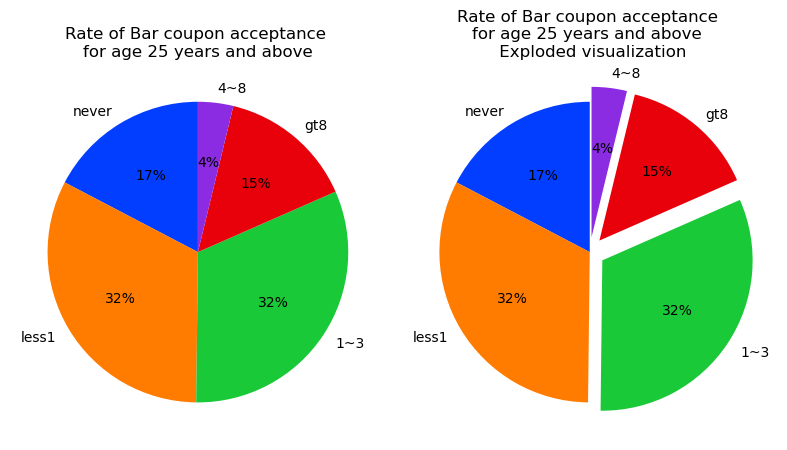

In [273]:
# Get unique bar attendance values and sort them
bar_attending_list = np.sort(dfBar['Bar'].unique())
# Initialize array to store count of bar coupon acceptances for people 25+ years
number_attending_bar_over25= [None]*len(bar_attending_list)
count = 0
# Count number of people 25+ years who accepted bar coupons for each attendance level
for attending_bar_item in bar_attending_list:
    number_attending_bar_over25[count] = len(dfBar.query('Bar ==@attending_bar_item and Y==1 and age >= 25'))
    #print((number_attending_bar_over25[count]))
    count = count+1

# Calculate total number of bar coupon acceptances for 25+ age group
total_bar_attendance_over25 = sum(number_attending_bar_over25)

# Calculate cumulative sum of bar coupon acceptances
total_bar_cum_attendance_over25 = np.cumsum(number_attending_bar_over25)

# Print the counts and totals
print(number_attending_bar_over25)
print(total_bar_attendance_over25)
print(total_bar_cum_attendance_over25)

# Initialize arrays for attendance rates
rate_of_attendance_over_25 = [None]*len(number_attending_bar_over25)
rate_of_cum_attendance_over_25 = [None]*len(number_attending_bar_over25)

# Calculate percentage rates of attendance and cumulative attendance
rate_of_attendance_over_25[:] = [x / total_bar_attendance_over25 for x in number_attending_bar_over25]
rate_of_cum_attendance_over_25[:] = [x / total_bar_attendance_over25 for x in total_bar_cum_attendance_over25]


fig, axes = plt.subplots(1, 2, figsize=(8, 6))
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
# plotting data on chart 
axes[0].pie(rate_of_attendance_over_25, labels=bar_labels, colors=palette_color, autopct='%.0f%%', startangle=90) 
# displaying chart 
axes[0].set_title('Rate of Bar coupon acceptance \nfor age 25 years and above')
explode=(0,0,0.1,0.1,0.1)
axes[1].pie(rate_of_attendance_over_25, labels=bar_labels, explode = explode, colors=palette_color, autopct='%.0f%%', startangle=90) 
# displaying chart 
axes[1].set_title('Rate of Bar coupon acceptance \nfor age 25 years and above \n Exploded visualization')
plt.savefig("images/couponAcceptanceForBarPieChartn.png")
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  1913 non-null   object
 1   age     1913 non-null   int64 
 2   Bar     1913 non-null   int64 
 3   Y       1913 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 74.7+ KB


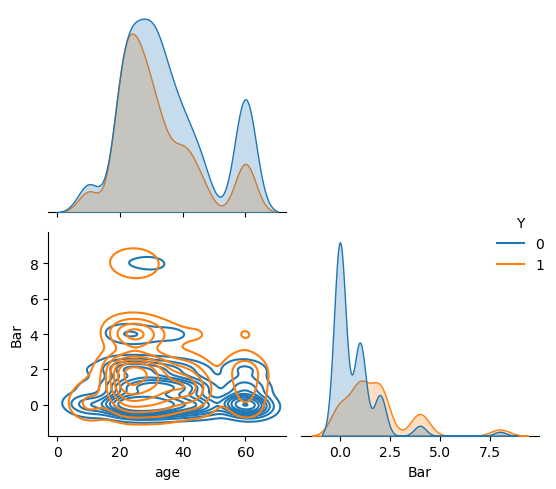

Correlation values for Age vs Bar Acceptance

          age       Bar
age  1.000000 -0.077277
Bar -0.077277  1.000000




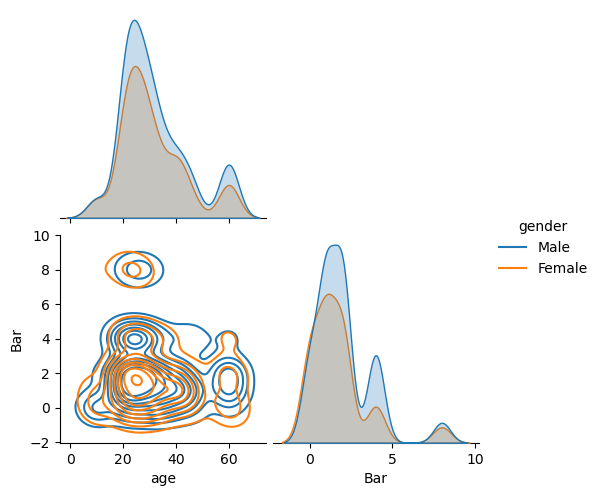

In [275]:
# Define columns of interest for age-bar analysis
selectedColumns = ['gender','age','Bar','Y']
# Create new dataframe with selected columns from dfBar
dfAgeBar = dfBar[selectedColumns];
dfAgeBar.info()

sns.pairplot(dfAgeBar,
             hue='Y',
             diag_kind = 'kde', kind = 'kde',
             corner = True, 
             diag_kws=dict(fill=True))
plt.tight_layout()
plt.savefig("images/pairplotAgeBarAcceptance.png")
plt.show()

# Calculate correlation between age and bar visits for accepted cases (Y=1)
ageBarCorrelation = dfAgeBar[dfAgeBar['Y']==1][['age','Bar']].corr()
print('Correlation values for Age vs Bar Acceptance\n')
print(ageBarCorrelation)
print('\n')

# Calculate correlation matrix for age, bar visits and acceptance status (Y) for all cases
ageBarYesCorrelation = dfAgeBar[['age','Bar','Y']].corr()

sns.pairplot(dfAgeBar[dfAgeBar['Y']==1][['gender','age','Bar']], hue='gender', diag_kind = 'kde', kind ='kde',corner = True)
#sns.pairplot(dfAgeBar[dfAgeBar['Y']==1][['age','Bar']],  diag_kind = 'kde', kind ='reg',corner = True)
plt.savefig("images/pairplotAgeBarGenderAcceptance.png")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Passenger vs Bar correlation: 

                Bar  passanger         Y
Bar        1.000000   0.004127  0.352512
passanger  0.004127   1.000000  0.028462
Y          0.352512   0.028462  1.000000




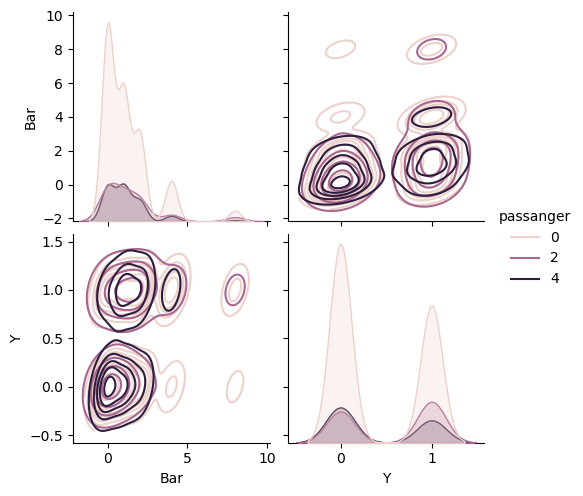

In [228]:
#print(dfBar['passanger'].unique())
# Convert passenger categories to numeric values (0: Alone, 1: Kid(s), 2: Friend(s), 4: Partner)
dfBar['passanger'].replace({'Alone':0, 'Kid(s)':1, 'Friend(s)':2,'Partner':4}, inplace = True)

#print(dfBar['occupation'].unique())
# Define occupation category to exclude from analysis
filterOutOccupation = ['Farming Fishing & Forestry']

# Select relevant columns for analysis
selectedColumns = ['Bar', 'passanger','Y']

# Create filtered dataframe excluding specified occupation and passengers with kids
barPassengerY = dfBar.query('occupation not in @filterOutOccupation and passanger != 1')[selectedColumns]

print('Passenger vs Bar correlation: \n')
print(barPassengerY.corr())
print('\n')

sns.pairplot(barPassengerY, hue='passanger', diag_kind = 'kde', kind ='kde',corner = False)
#sns.pairplot(barPassengerY[barPassengerY['Y']==1][['Bar', 'passanger']],  diag_kind = 'kde', kind ='kde',corner = False)
plt.savefig("images/pairplotPassengerBarNoKidAcceptance.png")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



# Question six issues:
Surprisingly, we still have vague questions, possibly in the examiner's mind; questions six and seven come together. Question six does not mention that the goal is to find the statistics mentioned on the Bar coupon recipients. Hence, general acceptance rates could be evaluated.
Question seven on the other hand asks for the hypothesis of the Bar Interestingly, there are still some unclear questions that may be lingering in the examiner's mind, particularly regarding questions six and seven, which are closely related. 

Question six does not explicitly state that the goal is to find the statistics related to Bar coupon recipients. Therefore, it could also lead to the evaluation of general acceptance rates. 

On the other hand, question seven asks for the hypothesis concerning Bar coupon acceptors, suggesting two potential interpretations. One interpretation focuses on Bar coupon acceptors, while the other implies that, despite question six being an independent inquiry, students should also consider the hypothesis related to Bar coupon acceptors.

Consequently, question six, while more likely linked to Bar coupon acceptance, should be approached with both conditions in mind.coupon acceptors, hinting at two possibilities. One question is about bar coupon acceptors, and two, despite question six being an independent question, the students should evaluate the hypothesis asked for bar coupon acceptors.

Hence, question six, despite the higher probability of being related to Bar coupon acceptance, is solved with both conditions in mind.

## First if the whole data is considered without the Bar coupon specifically in mind:
We could have done it the same way as  we did with question five and change the objects to numerical values that can be searched easier. But here we practice the <b> "in" </b> and <b> "not in" </b> in the query and avoid the change.

In [232]:
# we previously used a for loop method to calculate all the attendance rates
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# Define categorical values for filtering
widowed = 'Widowed'
kid = 'Kid(s)'
Alone = 'Alone'
goto_bar_once_or_less = ['never', 'less1']

# Count people who go to bar more than once, aren't with kids, and aren't widowed
bar_once_passngr_notkid_notwidowed = len(data.query('Bar not in @goto_bar_once_or_less and Y==1 and passanger not in @kid and maritalStatus not in @widowed'))

# Define age ranges for under 30
age_less_30_list = ['21', '26','below21'];

# Count people under 30 who go to bar more than once
bar_once_age_less_30 =  len(data.query('Bar not in @goto_bar_once_or_less and Y==1 and age in @age_less_30_list'))

# Define frequency ranges for restaurant visits
goto_restaurant_morethan4_list = ['4~8','gt8']
income_less_than_50k_list = []

# Convert income ranges to numeric values
data['income'] = data['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )

# Count people who frequently visit cheap restaurants and have income < 50k
cheap_retaurant_4more_income50k = len(data.query('RestaurantLessThan20  in @goto_restaurant_morethan4_list and Y==1 and income <50000'))

# Calculate total number of accepted cases
total_acceptance_data = sum(data['Y'] ==1)

# Count people who go to bar more than once and are alone
bar_once_and_alone =  len(data.query('Bar not in @goto_bar_once_or_less and Y==1 and passanger in @Alone'))

print('Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=\t\t',bar_once_passngr_notkid_notwidowed)
print('Number of acceptance for Bar attendance more than once and age less than 30 years=\t\t\t\t',bar_once_age_less_30)
print('Number of acceptance if going to cheap restaurant 4 times and income less than 50k=\t\t\t\t',cheap_retaurant_4more_income50k)
print('Number of acceptance if driving alone=\t\t\t\t\t\t\t\t\t\t',bar_once_and_alone)
print('Number of total acceptance=\t\t\t\t\t\t\t\t\t\t\t',total_acceptance_data)

# Create a list of calculated values for different cases
bar_chart_numbers = [bar_once_passngr_notkid_notwidowed, bar_once_age_less_30, cheap_retaurant_4more_income50k, bar_once_and_alone]

# Initialize empty list for storing rates
rate_bar_chart_numbers_total = [None]*len(bar_chart_numbers)

# Calculate rates by dividing each value by total acceptances
rate_bar_chart_numbers_total[:] = [x / total_acceptance_data for x in bar_chart_numbers]

# Define labels for bar chart cases
bar_chart_labels = ['Case 1','Case 2', 'Case 3']

Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=		 2225
Number of acceptance for Bar attendance more than once and age less than 30 years=				 1364
Number of acceptance if going to cheap restaurant 4 times and income less than 50k=				 1334
Number of acceptance if driving alone=										 1283
Number of total acceptance=											 6877


## 2nd considering that the questions are about the Bar coupon receipients
If the question is about Bar coupon receients, we can us ethe data that we have already filtered in question four and five.
We write the questions again:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

<b>This time consider that they drivers are Bar coupon reciepients</b>
- also reminder: <b>#dfBar are the drivers in data that received Bar coupon as in dfBar = data[data['coupon'].str.contains('Bar')] </b>
- We already have replaced Bar attendance, passenger (passanger) and age to integers to use in search and correleate it.

In [234]:
# Count acceptances where bar visits > 1, coupon accepted (Y=1), passenger not a kid, and not widowed
bar_once_passngr_notkid_notwidowed = len(dfBar.query('Bar > 1 and Y==1 and passanger!=1 and maritalStatus not in @widowed'))

# Count acceptances where bar visits > 1, coupon accepted (Y=1), and age under 30
bar_once_age_less_30 =  len(dfBar.query('Bar > 1 and Y==1 and age < 30'))

# Convert income ranges from string categories to numeric values
dfBar['income'] = dfBar['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )

# Count acceptances for cheap restaurant visitors (4+ times) with income < 50k
cheap_retaurant_4more_income50k = len(dfBar.query('RestaurantLessThan20  in @goto_restaurant_morethan4_list and Y==1 and income <50000'))

# Calculate total number of accepted coupons
total_acceptance = total_acceptance = sum(dfBar['Y'] ==1)

# Count acceptances where bar visits > 1, coupon accepted (Y=1), and driving alone
bar_once_and_alone =  len(dfBar.query('Bar > 1 and Y==1 and passanger==0'))

print('Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=\t\t',bar_once_passngr_notkid_notwidowed)
print('Number of acceptance for Bar attendance more than once and age less than 30=\t\t\t\t\t',bar_once_age_less_30)
print('Number of acceptance if going to cheap restaurant 4 times and income less than 50k=\t\t\t\t',cheap_retaurant_4more_income50k)
print('Number of acceptance if driving alone=\t\t\t\t\t\t\t\t\t\t',bar_once_and_alone)
print('Number of total acceptance=\t\t\t\t\t\t\t\t\t\t\t',total_acceptance)

# Create list of acceptance counts for different cases
bar_chart_numbers = [bar_once_passngr_notkid_notwidowed, bar_once_age_less_30, cheap_retaurant_4more_income50k, bar_once_and_alone]

# Initialize empty list to store acceptance rates
rate_bar_chart_numbers_BarCoupon = [None]*len(bar_chart_numbers)

# Calculate acceptance rates by dividing each count by total acceptances
rate_bar_chart_numbers_BarCoupon[:] = [x / total_acceptance for x in bar_chart_numbers]

# Define labels for each case in the bar chart
bar_chart_labels = ['Case 1','Case 2', 'Case 3', 'Case 4']

Number of acceptance for Bar attendance more than once and driver not widowed and passenger not kid=		 376
Number of acceptance for Bar attendance more than once and age less than 30=					 236
Number of acceptance if going to cheap restaurant 4 times and income less than 50k=				 152
Number of acceptance if driving alone=										 241
Number of total acceptance=											 788


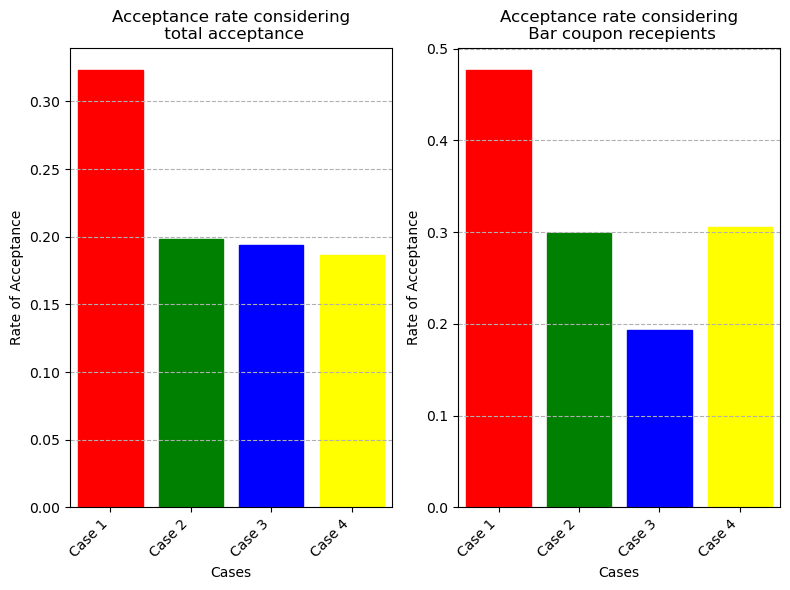

In [235]:
# Define color scheme
bar_colors = ['red', 'green', 'blue', 'yellow']
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.barplot(x=bar_chart_labels, y=rate_bar_chart_numbers_total, color = 'skyblue', ax = axes[0])
# Set the x-axis label to 'Coupon categories'
axes[0].set_xlabel('Cases')
# Set the y-axis label to 'Number' to show count
axes[0].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[0].set_title('Acceptance rate considering\n total acceptance')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[0].grid(axis='y', linestyle='--')
# written to avoid warning
axes[0].xaxis.set_ticks([0,1,2,3]) 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[0].set_xticklabels(bar_chart_labels, rotation=45, ha='right')  
# Apply colors to bars
apply_color_scheme(axes[0], bar_colors)


sns.barplot(x=bar_chart_labels, y=rate_bar_chart_numbers_BarCoupon, color = 'skyblue', ax = axes[1])
# Set the x-axis label to 'Coupon categories'
axes[1].set_xlabel('Cases')
# Set the y-axis label to 'Number' to show count
axes[1].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[1].set_title('Acceptance rate considering\n Bar coupon recepients')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[1].grid(axis='y', linestyle='--')
# written to avoid warning
axes[1].xaxis.set_ticks([0,1,2,3]) 
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[1].set_xticklabels(bar_chart_labels, rotation=45, ha='right')  
# Apply colors to bars
apply_color_scheme(axes[1], bar_colors)
# Display the plot    
plt.tight_layout()
plt.savefig("images/bar.png")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis
Drivers with moderate income with suitable company would more likely accept the coupons whatever they are. This holds true as well for Bar coupons.



# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Direction of travel and coupon timing affect
- lets see if direction and time to coupon has any effect




In [240]:
# Convert categorical time values to numerical (24-hour format)
data['time'] = data['time'].replace({'7AM':7, '10AM':10, '2PM':14, '6PM':18,'10PM':20})

# Convert age categories to numerical values (in years)
data['age'] = data['age'].replace({'21':21,'46':46,'26':26,'31':31,'41':41,'50plus':60,'below21':10, '36':36})

# Convert bar visit frequency to numerical scale (0-8)
data['Bar'] = data['Bar'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8})

# Convert income ranges to single numerical values (using upper bound)
data['income'] = data['income'].replace({'Less than $12500':12499, '$12500 - $24999':24999,'$25000 - $37499':37499,'$37500 - $49999':49999, '$50000 - $62499':62500, '$62500 - $74999':74500,'$75000 - $87499':87500,'$87500 - $99999':99999, '$100000 or More':100000 }, )

# Convert passenger types to numerical categories
data['passanger'] = data['passanger'].replace({'Alone':0, 'Kid(s)':1, 'Friend(s)':2,'Partner':4})
passanger_str = ['Alone', 'Kid', 'Friend', 'Partner'];

# Convert visit frequency categories to numerical values for different establishment types
data['Bar']= data['Bar'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
visit_str = ['Never', 'Rarely', '1 to 3', '4 to 8', 'grt 8'];
data['CoffeeHouse'] = data['CoffeeHouse'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
data['CarryAway'] = data['CarryAway'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 
data['Restaurant20To50'] = data['Restaurant20To50'].replace({'never':0, 'less1':1, '1~3':2, '4~8':4,'gt8':8}) 

# Analyze coupon acceptance patterns for same direction at different time thresholds
df_toCoupon5m = data.query('Y ==1 and toCoupon_GEQ5min== 1 and direction_same==1').groupby(['destination','coupon'])[['coupon']]
df_toCoupon15m = data.query('Y ==1 and toCoupon_GEQ15min== 1 and direction_same==1').groupby(['destination','coupon'])[['coupon']]
df_toCoupon25m = data.query('Y ==1 and toCoupon_GEQ25min== 1 and direction_same==1').groupby(['destination','coupon'])[['coupon']]
df5_same = df_toCoupon5m.describe()
df15_same = df_toCoupon15m.describe()
df25_same = df_toCoupon25m.describe()

print("distribution of Acceptances within 5 minutes of destination in same direction\n",df5_same)
print("\n")
print("distribution of Acceptances within 15 minutes of destination in same direction\n",df15_same)
print("\n")
print("distribution of Acceptances within 25 minutes of destination in same direction\n",df25_same)
print("\n")

# Analyze coupon acceptance for opposite direction at different time thresholds
# Filter data for accepted coupons (Y=1) within 5 mins in opposite direction, group by destination and coupon type
df_toCoupon5m = data.query('Y ==1 and toCoupon_GEQ5min== 1 and direction_opp==1').groupby(['destination','coupon'])[['coupon']]
# Filter data for accepted coupons within 15 mins in opposite direction
df_toCoupon15m = data.query('Y ==1 and toCoupon_GEQ15min== 1 and direction_opp==1').groupby(['destination','coupon'])[['coupon']]
# Filter data for accepted coupons within 25 mins in opposite direction  
df_toCoupon25m = data.query('Y ==1 and toCoupon_GEQ25min== 1 and direction_opp==1').groupby(['destination','coupon'])[['coupon']]

# Get descriptive statistics for each time threshold
df5_opp = df_toCoupon5m.describe()
df15_opp = df_toCoupon15m.describe()
df25_opp = df_toCoupon25m.describe()

print("distribution of Acceptances within 5 minutes of destination in opposite direction\n",df5_opp)
print("\n")
print("distribution of Acceptances within 15 minutes of destination in opposite direction\n",df15_opp)
print("\n")
print("distribution of Acceptances within 25 minutes of destination in opposite direction\n",df25_opp)
print("\n")

distribution of Acceptances within 5 minutes of destination in same direction
                            coupon                            
                            count unique             top freq
destination coupon                                           
Home        Bar               158      1             Bar  158
            Coffee House      147      1    Coffee House  147
            Low restaurant    223      1  Low restaurant  223
            Mid restaurant     94      1  Mid restaurant   94
            Take away         248      1       Take away  248
Work        Bar                25      1             Bar   25
            Coffee House      230      1    Coffee House  230
            Low restaurant     83      1  Low restaurant   83
            Mid restaurant     20      1  Mid restaurant   20
            Take away         287      1       Take away  287


distribution of Acceptances within 15 minutes of destination in same direction
                            coupon

                            destination
destination coupon                     
Home        Bar                     158
            Coffee House            147
            Low restaurant          223
            Mid restaurant           94
            Take away               248
Work        Bar                      25
            Coffee House            230
            Low restaurant           83
            Mid restaurant           20
            Take away               287
                                destination
destination     coupon                     
Home            Bar                      60
                Coffee House            175
                Low restaurant           43
                Mid restaurant          177
                Take away               243
No Urgent Place Bar                     400
                Coffee House           1187
                Low restaurant         1293
                Mid restaurant          196
                Take away           

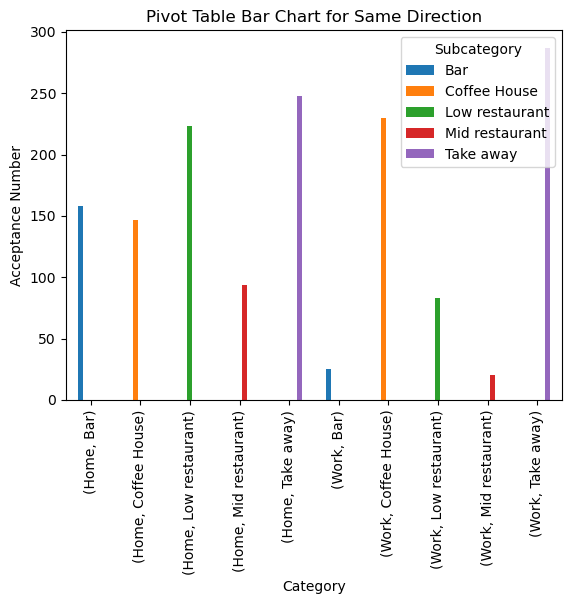

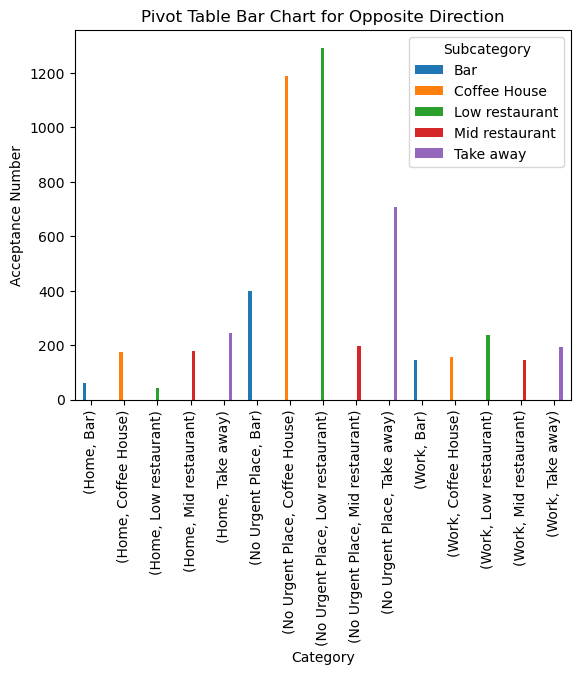

In [301]:
#data['destination'].unique()
#array(['No Urgent Place', 'Home', 'Work'], dtype=object)
#print("Number of those accepted while driving in the same direction of coupon",data.query('direction_same==1 and Y==1').groupby('destination').size())
#print("Number of those accepted while driving in opposite direction of their destination",data.query('direction_opp==1 and Y==1').groupby('destination').size())

# Calculate acceptance counts for coupons when driving in the same direction
# Filters for direction_same=1 (same direction) and Y=1 (accepted), then groups by destination and coupon type
same_direction = data.query('direction_same==1 and Y==1').groupby(['destination','coupon'])[['destination']].count()

# Calculate acceptance counts for coupons when driving in opposite direction
# Filters for direction_opp=1 (opposite direction) and Y=1 (accepted), then groups by destination and coupon type
opp_direction = data.query('direction_opp==1 and Y==1').groupby(['destination','coupon'])[['destination']].count()
print(same_direction)
print(opp_direction)

# Create a pivot table from same_direction DataFrame with destination values, using index from same_direction and coupon as columns
pivot_table = same_direction.pivot_table(values = 'destination', index = same_direction.index, columns = 'coupon')
# Generate a bar plot visualization from the pivot table data
pivot_table.plot(kind = 'bar')
# Customize the chart (optional)
plt.title('Pivot Table Bar Chart for Same Direction')
plt.xlabel('Category')
plt.ylabel('Acceptance Number')
plt.legend(title='Subcategory')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.savefig("images/sameDirectionAcceptance.png")
# Show the chart
plt.show()

# Create a pivot table from Opposite direction DataFrame with destination values, using index from same_direction and coupon as columns
pivot_table = opp_direction.pivot_table(values = 'destination', index = opp_direction.index, columns = 'coupon')
pivot_table.plot(kind = 'bar')
# Customize the chart (optional)
plt.title('Pivot Table Bar Chart for Opposite Direction')
plt.xlabel('Category')
plt.ylabel('Acceptance Number')
plt.legend(title='Subcategory')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

plt.savefig("images/oppositeDirectionAcceptance.png")

# Show the chart
plt.show()

# Direction of driving influence on coupon acceptance
- Direction of driving has an affect on how the drivers accept coupons and which coupons they accept.
In direction of driving, drivers are more likely tend to accept take aways when they are driving home or to work
- I opposite direction of driving, drivers hardly respond to anything on the way to home or work. In case the drivers ar ein no hurry to go anywere particular, low end restaurants, coffee houses and take aways have high chances of acceptance.
- Base don this study, my suggestion is to always send take away coupons or coffee house coupons on working hours (early mornings) and during the evening when it is most likely to have commuters to work and home. On the weekends, were people are less busy, low end restaurants is a good option and more likely to be accepted.
- The field  of 5 min away from coupon destination has no information. Meaning, being 5 minutes away does not define which coupon the driver accepts.
- Contrary to the 5 min coupon, the 15 and 25 min coupon have significant effect. If the driver is  driving towards home or work, he would not be accepting any coupon that is 25 min away.
- If he is 15 min away from the coupon destination and in opposite direction. He would likely accept if he has nothing to do. Hence it is important to only send coupons that are 5min or 15 min away, within the direction of the driver.



# Expensive Restuarant Coupon and Charachterisation of Passengers
- Pick all drivers receiving mid level restaurant
- Find the acceptance rate for mid level restaurant
- Find the income correlation of accepting mid level restaurant coupon
- Find the passanger correlation on mid level restaurant
- Use all simplification made by replacing the category with numbers


In [244]:
df_mid_rest = data[data['coupon'].str.contains('Mid restaurant')]
# Get total number of records in dataset
totalNumberMidRest = df_mid_rest['Y'].count()
# Count number of records where Y equals 1 (accepted)
numberAcceptedMidRest= (df_mid_rest['Y']==1).sum()
# Calculate percentage of accepted records
percentAcceptedMidRest = numberAcceptedMidRest/totalNumberMidRest;
# Print total number of records
print('Total number of Mid level Restaurant coupons are=\t\t\t',totalNumberMidRest)
# Print number of accepted records
print('Number of Mid level Restaurant coupons accepted is=\t\t\t',numberAcceptedMidRest)
# Print percentage of accepted records
print('Percent of Mid level Restaurant coupons accepte is=\t\t\t',percentAcceptedMidRest)

Total number of Mid level Restaurant coupons are=			 1417
Number of Mid level Restaurant coupons accepted is=			 632
Percent of Mid level Restaurant coupons accepte is=			 0.44601270289343686


In [245]:
# Calculate value counts for different features where Y=1 (positive cases)

# Count frequency of income levels
mid_rest_income        = df_mid_rest.query('Y==1').groupby('income')[['income']].value_counts()

# Count frequency of different time periods
mid_rest_time          = df_mid_rest.query('Y==1').groupby('time')[['time']].value_counts()

# Count frequency of passenger numbers
mid_rest_passanger     = df_mid_rest.query('Y==1').groupby('passanger')[['passanger']].value_counts()

# Count frequency of marital status categories  
mid_rest_maritalStatus = df_mid_rest.query('Y==1').groupby('maritalStatus')[['maritalStatus']].value_counts()   

# Count frequency of weather conditions
mid_rest_weather       = df_mid_rest.query('Y==1').groupby('weather')[['weather']].value_counts()   

# Count frequency of temperature ranges
mid_rest_temperature   = df_mid_rest.query('Y==1').groupby('temperature')[['temperature']].value_counts()  

# Count frequency of expiration categories
mid_rest_expiration    = df_mid_rest.query('Y==1').groupby('expiration')[['expiration']].value_counts()  

# Count frequency of education levels
mid_rest_education     = df_mid_rest.query('Y==1').groupby('education')[['education']].value_counts()  

# Count frequency of restaurant visits in 20-50 price range
mid_rest_visit         = df_mid_rest.query('Y==1').groupby('Restaurant20To50')[['Restaurant20To50']].value_counts()  

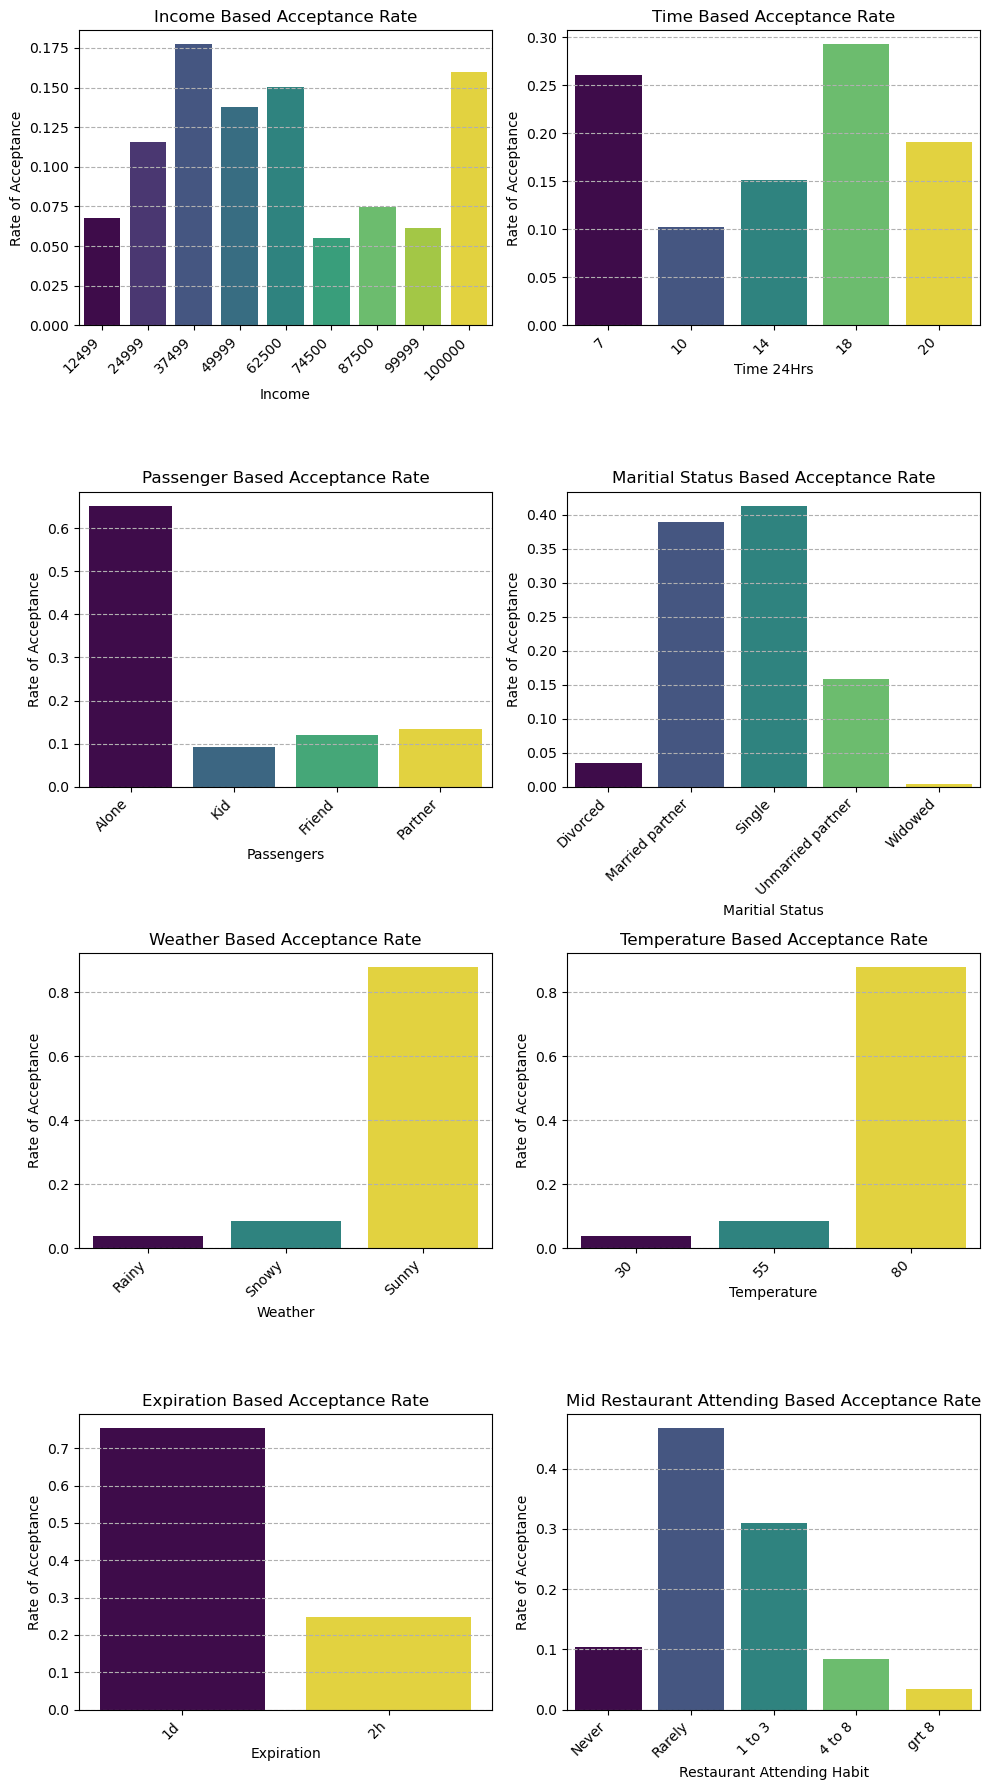

In [246]:
# Create a figure with 4 rows and 2 columns of subplots, with size 10x18 inches
fig, axes = plt.subplots(4, 2, figsize=(10, 18))
# Flatten the 2D array of axes into 1D for easier indexing
axes = axes.flat

# Get number of income categories
num_categories= len(mid_rest_income.index)
# Initialize array to store acceptance rates
mid_rest_income_rate = [None]*num_categories
# Calculate acceptance rate for each income category by dividing by total accepted coupons
mid_rest_income_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_income]

# Create bar plot of acceptance rates by income using viridis color palette
sns.barplot(x=mid_rest_income.index,  y=mid_rest_income_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[0])
# Set the x-axis label to 'Coupon categories'
axes[0].set_xlabel('Income')
# Set the y-axis label to 'Number' to show count
axes[0].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[0].set_title('Income Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[0].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[0].set_xticklabels(mid_rest_income.index, rotation=45, ha='right')  

# Calculate number of time categories for mid-range restaurants
num_categories= len(mid_rest_time.index)
# Initialize array to store acceptance rates for each time category
mid_rest_time_rate = [None]*num_categories
# Calculate acceptance rate by dividing counts by total accepted mid-range restaurant coupons
mid_rest_time_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_time]
# Create bar plot showing acceptance rate by time of day, using viridis color palette
sns.barplot(x=mid_rest_time.index,  y=mid_rest_time_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[1])
# Set the x-axis label to 'Coupon categories'
axes[1].set_xlabel('Time 24Hrs')
# Set the y-axis label to 'Number' to show count
axes[1].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[1].set_title('Time Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[1].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[1].set_xticklabels(mid_rest_time.index, rotation=45, ha='right')  

# Calculate number of passenger categories for mid-range restaurants
num_categories= len(mid_rest_passanger.index)

# Initialize array to store acceptance rates for each passenger category
mid_rest_passanger_rate = [None]*num_categories

# Calculate acceptance rate by dividing counts by total accepted mid-range restaurant coupons
mid_rest_passanger_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_passanger]

# Create bar plot showing acceptance rate by passangers, using viridis color palette
sns.barplot(x=passanger_str,  y=mid_rest_passanger_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[2])
# Set the x-axis label to 'Coupon categories'
axes[2].set_xlabel('Passengers')
# Set the y-axis label to 'Number' to show count
axes[2].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[2].set_title('Passenger Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[2].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[2].set_xticklabels(passanger_str, rotation=45, ha='right')  

# Calculate number of marital status categories
num_categories= len(mid_rest_maritalStatus.index)

# Initialize array to store acceptance rates for each marital status
mid_rest_maritalStatus_rate = [None]*num_categories

# Calculate acceptance rate by dividing count by total accepted mid-restaurant coupons
mid_rest_maritalStatus_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_maritalStatus]

# Create bar plot showing acceptance rate by marital status using viridis color palette
sns.barplot(x=mid_rest_maritalStatus.index,  y=mid_rest_maritalStatus_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[3])
# Set the x-axis label to 'Coupon categories'
axes[3].set_xlabel('Maritial Status')
# Set the y-axis label to 'Number' to show count
axes[3].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[3].set_title('Maritial Status Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[3].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[3].set_xticklabels(mid_rest_maritalStatus.index, rotation=45, ha='right')  

# Calculate number of weather categories
num_categories= len(mid_rest_weather.index)

# Initialize array to store weather-based acceptance rates
mid_rest_weather_rate = [None]*num_categories

# Calculate acceptance rate for each weather category by dividing counts by total accepted mid-range restaurant coupons
mid_rest_weather_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_weather]

# Create bar plot showing acceptance rates by weather condition using viridis color palette
sns.barplot(x=mid_rest_weather.index,  y=mid_rest_weather_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[4])
# Set the x-axis label to 'Coupon categories'
axes[4].set_xlabel('Weather')
# Set the y-axis label to 'Number' to show count
axes[4].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[4].set_title('Weather Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[4].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[4].set_xticklabels(mid_rest_weather.index, rotation=45, ha='right') 

# Create bar plot showing acceptance rates by weather condition using viridis color palette
num_categories= len(mid_rest_temperature.index)

# Initialize array to store acceptance rates for each temperature category
mid_rest_temperature_rate = [None]*num_categories

# Calculate acceptance rate by dividing counts by total accepted mid-range restaurant coupons
mid_rest_temperature_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_weather]

# Create bar plot showing acceptance rate by temperature category using viridis color palette
sns.barplot(x=mid_rest_temperature.index,  y=mid_rest_temperature_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[5])
# Set the x-axis label to 'Coupon categories'
axes[5].set_xlabel('Temperature')
# Set the y-axis label to 'Number' to show count
axes[5].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[5].set_title('Temperature Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[5].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[5].set_xticklabels(mid_rest_temperature.index, rotation=45, ha='right') 

# Get the number of expiration categories
num_categories= len(mid_rest_expiration.index)

# Initialize array to store acceptance rates
mid_rest_expiration_rate = [None]*num_categories

# Calculate acceptance rate for each expiration category by dividing by total accepted coupons
mid_rest_expiration_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_expiration]

# Create bar plot showing acceptance rate by expiration category using viridis color palette
sns.barplot(x=mid_rest_expiration.index,  y=mid_rest_expiration_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[6])
# Set the x-axis label to 'Coupon categories'
axes[6].set_xlabel('Expiration')
# Set the y-axis label to 'Number' to show count
axes[6].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[6].set_title('Expiration Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[6].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[6].set_xticklabels(mid_rest_expiration.index, rotation=45, ha='right') 


# Calculate number of visit frequency categories
num_categories= len(mid_rest_visit.index)

# Initialize array to store acceptance rates
mid_rest_visit_rate = [None]*num_categories

# Calculate acceptance rate for each visit frequency by dividing by total accepted coupons
mid_rest_visit_rate[:] = [x / numberAcceptedMidRest for x in mid_rest_visit]

# Create bar plot showing acceptance rate by visit frequency using viridis color palette
sns.barplot(x=visit_str,  y=mid_rest_visit_rate, palette=plt.cm.viridis(np.linspace(0, 1, num_categories)), ax = axes[7])
# Set the x-axis label to 'Coupon categories'
axes[7].set_xlabel('Restaurant Attending Habit')
# Set the y-axis label to 'Number' to show count
axes[7].set_ylabel('Rate of Acceptance')
# Set the plot title to 'Coupon Categories'
axes[7].set_title('Mid Restaurant Attending Based Acceptance Rate')
# Add dotted horizontal grid lines to improve readability of the y-axis values
axes[7].grid(axis='y', linestyle='--')
# written to avoid warning
# Rotate x-axis labels by 45 degrees and align them to the right for better readability
axes[7].set_xticklabels(visit_str, rotation=45, ha='right') 

# Display the plot    
plt.tight_layout()
plt.savefig("images/midRestaurantAcceptanceRates.png")
plt.show()

# Hypothesis
- It is important to send coupons that have greater expiration time. One day expiration rate has 3 times higher acceptance rate than a two hour expiry date
- People who rarely go to mid priced restaurants tend to accept the coupons at higher rate.
- Drivers tend to accept the coupons on a hot sunny day rather than a gloomy rainy day. The rate is above 80 percent.
- Single and unmarried drivers with a partner tend to accept the coupon at higher rate. The tend to accept it at much higher rate if they are alone in the car. Perhaps thinking about their partner when accepting it.
- Mid level restaurants tend to attract mid level incomes or a very high income drivers. It is unkown why high income and abiove 100K accept it.
- Drivers tend to accept the coupon very early in the morning or in the evening.
## Suggestion based on the facts
- Base don the above information, one should target lone drivers that are single or unmarried in a sunny hot day with coupons with expiray date greater than a day. A driver that attend mid level restaurants occasonally or never at all, tend to accept the coupon less, ths targeting drivers that rarely attend restaurants is a better approach. Also it is better to sne dthese coupons in teh afternoon or early morning.
  